# Finding the Optimal Time Window for Detecting RR Interval

In [67]:
import numpy
import matplotlib.pyplot as plt
#%matplotlib inline
fps = 30.323427803

This function obtains a list of color component from txt file.


In [68]:
def readFromFile(fileName):
    l =numpy.loadtxt(fileName)
    return l[0], l[1], l[2]

This function runs through the color list, returns the peak that are local maxima for an interval of 2 times the frameThreshold. It returns the list of peaks. For exmple, if frameThreshold is 10, it returns only the maxima that are greater than the values of 10 frames before and those of 10 frames after.

In [69]:
def detectPeak(colorL, frameThreshold):
    peakL = list()
    colorlistLen = len(colorL)
    for i in range(1, colorlistLen-1):
        biggerThanPrevious = colorL[i] > colorL[i-1]
        biggerThanAfter = colorL[i] > colorL[i+1]
        #if it is a local maximum, then check if it is a RR peak by comparing its maxima interval to frameThreshold
        if biggerThanPrevious and biggerThanAfter:
            for k in range(2, frameThreshold+1):
                if i-k >= 0:
                    if not colorL[i] > colorL[i-k]:
                        #this is not a rr peak
                        break
                if i+k < colorlistLen:
                    if not colorL[i] > colorL[i+k]:
                        #this is not a rr peak
                        break
            else:
                #this IS a rr peak, store the array index
                peakL.append(i)
    return peakL

This function constructs rr Interval list from the peak list generated from detectPeak function

In [70]:
def constructRRIntervalList(peakL):
    return [ (peakL[i]-peakL[i-1])/fps for i in range(1, len(peakL))]

In [71]:
def constructTimeListFromRRList(rrL):
    tL = list()
    tL.append(rrL[0])
    for i in range(1, len(rrL)):
        tL.append(tL[i-1]+rrL[i])
    return tL

This function graph the data.

In [72]:
def plot(inVarList, deVarList, inVarName, deVarName, yBegin=0, yEnd=1.5):
    plt.plot(inVarList, deVarList)
    plt.xlabel(inVarName)
    plt.ylabel(deVarName)
    plt.title(inVarName+' vs '+deVarName)
    plt.ylim(yBegin, yEnd)
    plt.show()

This function defines the criteria for being a true RR interval.

In [73]:
def isTrueRRInterval(rrInterval):
    if 0.8 <= rrInterval and rrInterval <= 1.2:
        return True
    else:
        return False

This function detect the amount of errors in a list of RR interval, as judged by function isTrueRRInterval

In [74]:
def getAmountOfError(rrL):
    errorNum = 0
    for rrInterval in rrL:
        if (not isTrueRRInterval(rrInterval)):
            errorNum += 1
    return errorNum

This function analyze the rgb txt file of a PPG video and return important information.

In [78]:
def analyzeVideoRGB(fileName):
    print("Analyzing "+fileName)
    rL, gL, bL = readFromFile(fileName)
    for frameThreshold in range(12, 13):
        rRRL = constructRRIntervalList(detectPeak(rL, frameThreshold))
        gRRL = constructRRIntervalList(detectPeak(gL, frameThreshold))
        bRRL = constructRRIntervalList(detectPeak(bL, frameThreshold))
        rError = getAmountOfError(rRRL)
        gError = getAmountOfError(gRRL)
        bError = getAmountOfError(bRRL)
        print("For Frame Threshold of {:2d}: Red has {:2d} errors | Green has {:2d} errors | Blue has {:2d} errors"
              .format(frameThreshold*2, rError, gError, bError))

# Debug

In [80]:
videoList = ["/home/mong/Desktop/map/map/videos/VID_20150123_172926_F.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_173259_Q.mp4.txt"]
for video in videoList:
    analyzeVideoRGB(video)
    print("\n")

Analyzing /home/mong/Desktop/map/map/videos/VID_20150123_172926_F.mp4.txt
For Frame Threshold of 24: Red has 39 errors | Green has 41 errors | Blue has 39 errors


Analyzing /home/mong/Desktop/map/map/videos/VID_20150123_173259_Q.mp4.txt
For Frame Threshold of 24: Red has  2 errors | Green has  2 errors | Blue has  9 errors




# The first video that has a lower avgergae rr interval

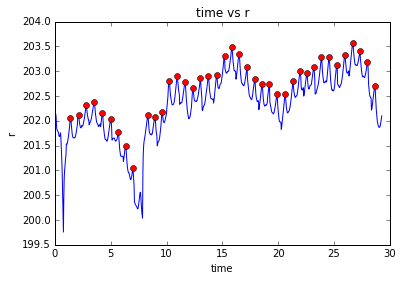

In [82]:
rL, gL, bL = readFromFile("/home/mong/Desktop/map/map/videos/VID_20150123_172926_F.mp4.txt")
def constructTimeList(numOfElement, deltaTime):
    l = list()
    l.append(0)
    for i in range(1, numOfElement):
        l.append(l[i-1]+deltaTime)
    return l
tL = constructTimeList(len(rL), 1/fps)
pL = detectPeak(rL, 10)
plt.plot(tL, rL)
plt.xlabel("time")
plt.ylabel("r")
plt.title("time"+' vs '+"r")
plt.plot([p/30.32 for p in pL],[rL[p] for p in pL],'ro')
plt.show()
# plot(tL, rL, "time", "R color", yBegin=199, yEnd=204)


In [83]:
constructRRIntervalList(pL)

[0.7255116454157423,
 0.6925338433513905,
 0.7255116454157423,
 0.7255116454157423,
 0.7584894474800943,
 0.6595560412870385,
 0.6595560412870385,
 0.6595560412870385,
 1.319112082574077,
 0.6265782392226866,
 0.6595560412870385,
 0.6265782392226866,
 0.7255116454157423,
 0.7255116454157423,
 0.6925338433513905,
 0.6595560412870385,
 0.7255116454157423,
 0.7255116454157423,
 0.7255116454157423,
 0.6595560412870385,
 0.6265782392226866,
 0.7255116454157423,
 0.6925338433513905,
 0.6595560412870385,
 0.6265782392226866,
 0.6925338433513905,
 0.7255116454157423,
 0.6925338433513905,
 0.6595560412870385,
 0.5936004371583347,
 0.6265782392226866,
 0.6925338433513905,
 0.6925338433513905,
 0.6925338433513905,
 0.6925338433513905,
 0.7255116454157423,
 0.6595560412870385,
 0.6595560412870385,
 0.6595560412870385]

# The second video that has higher average rr interval, which happens to fit in 0.8-1.2

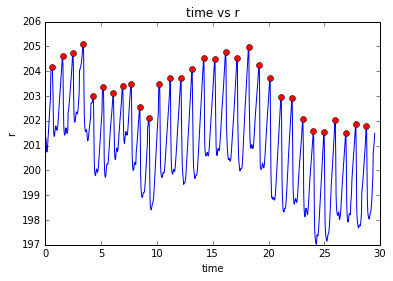

In [84]:
rL, gL, bL = readFromFile("/home/mong/Desktop/map/map/videos/VID_20150123_173259_Q.mp4.txt")
def constructTimeList(numOfElement, deltaTime):
    l = list()
    l.append(0)
    for i in range(1, numOfElement):
        l.append(l[i-1]+deltaTime)
    return l
tL = constructTimeList(len(rL), 1/fps)
pL = detectPeak(rL, 10)
plt.plot(tL, rL)
plt.xlabel("time")
plt.ylabel("r")
plt.title("time"+' vs '+"r")
plt.plot([p/30.32 for p in pL],[rL[p] for p in pL],'ro')
plt.show()
# plot(tL, rL, "time", "R color", yBegin=199, yEnd=204)


In [85]:
constructRRIntervalList(pL)

[0.9233784578018539,
 0.9233784578018539,
 0.9233784578018539,
 0.8904006557375019,
 0.8904006557375019,
 0.9233784578018539,
 0.8244450516087981,
 0.7584894474800943,
 0.7584894474800943,
 0.8244450516087981,
 0.9563562598662059,
 0.9563562598662059,
 0.9563562598662059,
 1.0223118639949096,
 1.0223118639949096,
 0.9893340619305577,
 0.9893340619305577,
 1.0223118639949096,
 1.0223118639949096,
 0.9563562598662059,
 0.9563562598662059,
 0.9893340619305577,
 0.9893340619305577,
 0.9563562598662059,
 0.9563562598662059,
 0.9563562598662059,
 0.9893340619305577,
 0.9563562598662059,
 0.8904006557375019,
 0.9563562598662059]